# Regressão logística

A regressão logística é um modelo de regressão utilizado quando queremos categorizar uma variável por classes, ou seja, quando a variável que queremos prever é discreta.

## Bibliotecas

Serão utilizadas as bibliotecas numpy para a realização de operações matemáticas em array e matrizes multidimensionais, pandas para a importação do dataset, matplotlib para plotagem de gráficos e scipy para otimizar o modelo da regressão logística.

In [494]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt

## Importação de dados

O dataset utilizado contém resultados de duas avaliações de estudante e se estes estudantes foram admitidos na universidade. A primeira coluna do dataset corresponde a primeira avaliação, a segunda coluna corresponde a segunda avaliação e a terceira coluna indica se o estudante foi aprovado ou não. Ao longo do trabalho as notas da avaliações são definidas pela variável *X* e a aprovação é definida pela variável *y*.

In [495]:
data = pd.read_csv('data/ex2data1.txt', header=None, names=['P1', 'P2', 'Aprovado'])

In [496]:
data.head()

,P1,P2,Aprovado
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [497]:
data.describe()

,P1,P2,Aprovado
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [524]:
X = np.array(data.iloc[:,:-1])
y = np.array(data.iloc[:,2])
m = len(y)
X_ones = np.append(np.ones([m, 1]), X, axis=1)

## Visualização de dados

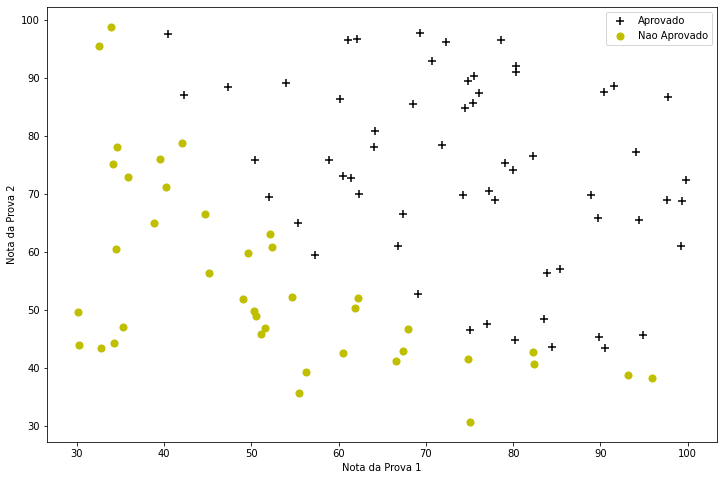

In [537]:
pos = X[y == 1]
neg = X[y == 0]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(pos[:, :-1], pos[:, -1:], s=50, c='k', marker='+', label='Aprovado')
ax.scatter(neg[:, :-1], neg[:, -1:], s=50, c='y', marker='o', label='Nao Aprovado')
ax.legend()
ax.set_xlabel('Nota da Prova 1')
ax.set_ylabel('Nota da Prova 2')
plt.show()

## Função sigmoide

Como na regressão logística estamos querendo prever valores discretos devemos utilizar uma função de hipótese $h_\theta$ de forma que $ 0 \leq h_\theta \geq 1 $. Com esta finalidade podemos utilizar a função sigmoide que mapeia os valores entre 0 e 1, e é definida da seguinte forma:

$$ g(z) = \frac{1}{1 + e^{-z}} $$

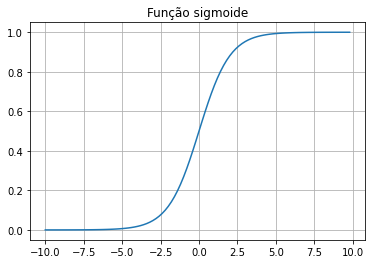

In [538]:
def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))

x = np.arange(-10., 10., 0.2)
sig = sigmoid(x)

plt.plot(x, sig)
plt.title('Função sigmoide')
plt.grid(True)
plt.show()

## Função de custo e gradiente

Conforme abordado na sessão anterior, para a função de hipótese iremos utilizar a função sigmoide.

$$ h_\theta(x) = g(\theta^T x) $$
$$ z = \theta^T x $$
$$ g(z) = \frac{1}{1 + e^{-z}} $$

Para a regressão logística iremos utilizar uma função de custo que se comporta de maneiras diferentes dependendo do valor de *y*, definida da seguinte forma:

$$ J(\theta) = \frac{1}{m} \sum_{i=1}^m \text{Cost}\left(h_\theta(x^{(i)}), y^{(i)} \right) $$
$$ \text{Cost}\left(h_\theta(x), y\right) = 
\begin{cases}
    -\log\left(h_\theta(x)\right) & \text{if } y = 1 \\
    -\log\left(1 - h_\theta(x)\right) & \text{if } y = 0
\end{cases} $$

Para simplificar, podemos reescrever a função de custo da seguinte maneira:

$$ J(\theta) = -\frac{1}{m} \sum_{i=1}^m \left[ y^{(i)} \log\left(h_\theta(x^{(i)})\right) + (1 - y^{(i)}) \log\left(1 - h_\theta(x^{(i)})\right) \right] $$

O gradiente é definido da mesma maneira que a regressão linear:

$$ \theta_j := \theta_j - \alpha \frac{\partial}{\partial\theta_j}J(\theta) $$

Derivando:

$$ \theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)} \right) x^{(i)}_j $$

In [535]:
def compute_cost(theta, X, y):
    grad0 = -y * np.log(sigmoid(X @ theta))
    grad1 = (1 - y) * np.log(1 - sigmoid(X @ theta))
    return np.sum(grad0 - grad1) / m

def gradient(theta, X, y):
    m = len(y)
    return (X.T @ (sigmoid(X @ theta) - y)) / m

X_ones = np.append(np.ones([m, 1]), X, axis=1)
theta = np.zeros(3)
print(f'Custo: {compute_cost(theta, X_ones, y)}')

Custo: 0.6931471805599453


## Aprendizado dos parâmetros

Para o aprendizado dos parâmetros iremos utilizar a biblioteca scipy, a função *fmin_tnc* recebe como parâmetros a função para computar o custo, o valor inicial dos parâmetros, a função que calcula a derivada do gradiente e valores do dataset para serem passados para as funções.

In [536]:
result = opt.fmin_tnc(func=compute_cost, x0=theta, fprime=gradient, args=(X_ones, y))
theta_fit = result[0]
print(f'Parâmetros theta: {theta_fit}')
print(f'Custo: {compute_cost(theta_fit, X_ones, y)}')

Parâmetros theta: [-25.16131863   0.20623159   0.20147149]
Custo: 0.2034977015894746


## Avaliação do modelo

In [544]:
X_aval = np.array([1., 45. ,85.])
h = sigmoid(X_aval @ theta_fit) * 100

print(f'Caso um candidato obtenha as notas 45 e 85 nas avaliações a probabilidade de aprovação é de aproximadamente {round(h)}%')

Caso um candidato obtenha as notas 45 e 85 nas avaliações a probabilidade de aprovação é de aproximadamente 78%


In [540]:
def predizer(theta, X):
    probabilidade = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probabilidade]

def acuracia(X, y, result):
    theta_min = np.matrix(result[0])
    predicoes = predizer(theta_min, X)
    corretas = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predicoes, y)]  
    return (sum(map(int, corretas)) % len(corretas))

print(f'Acurácia do modelo: {acuracia(X_ones, y, result)}%')

Acurácia do modelo: 89%
